Solving the 8-Queens Problem using A* Search


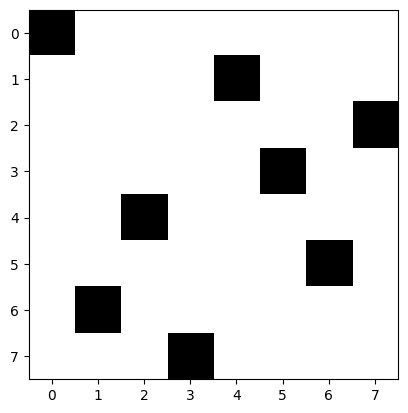

Solution: [0, 4, 7, 5, 2, 6, 1, 3]


In [1]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

# Function to check if the position is safe for the queen
def is_safe(state, row, col):
    for i in range(row):
        if state[i] == col or \
           state[i] - i == col - row or \
           state[i] + i == col + row:
            return False
    return True

# Function to calculate the heuristic value (number of attacking pairs)
def heuristic(state):
    h = 0
    n = len(state)
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] == state[j] or \
               state[i] - i == state[j] - j or \
               state[i] + i == state[j] + j:
                h += 1
    return h

# Function to generate new states
def generate_new_states(state, n):
    new_states = []
    row = len(state)
    if row < n:
        for col in range(n):
            if is_safe(state, row, col):
                new_state = state + [col]
                h_value = heuristic(new_state)
                new_states.append((h_value, new_state))
    return new_states

# Function to visualize the board
def visualize_board(state, n):
    board = np.zeros((n, n), dtype=int)
    for row, col in enumerate(state):
        board[row, col] = 1
    plt.imshow(board, cmap='binary')
    plt.show()

# A* Search implementation for 8-queens
def a_star_8_queens(n):
    initial_state = []
    initial_h = heuristic(initial_state)
    frontier = [(initial_h, initial_state)]  # Priority queue ordered by F(NODE) = H(NODE)
    heapq.heapify(frontier)
    explored = set()

    while frontier:
        _, current_state = heapq.heappop(frontier)
        
        if len(current_state) == n:
            visualize_board(current_state, n)
            print("Solution:", current_state)
            return current_state
        
        explored.add(tuple(current_state))
        
        for h_value, new_state in generate_new_states(current_state, n):
            if tuple(new_state) not in explored:
                heapq.heappush(frontier, (h_value, new_state))

    return None

# Driver Code
n = 8  # For 8-queens problem
print("Solving the 8-Queens Problem using A* Search")
solution = a_star_8_queens(n)


Following is the A* Search for the maze problem:


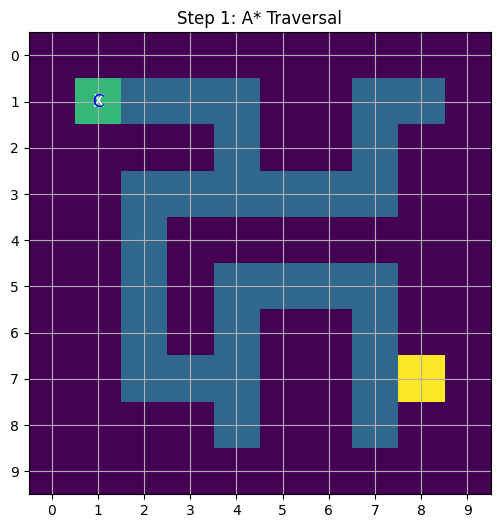

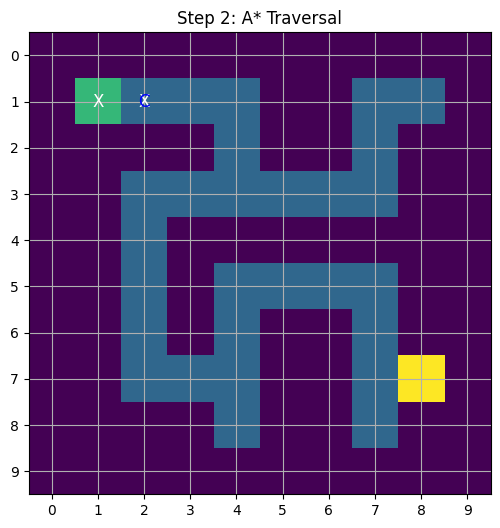

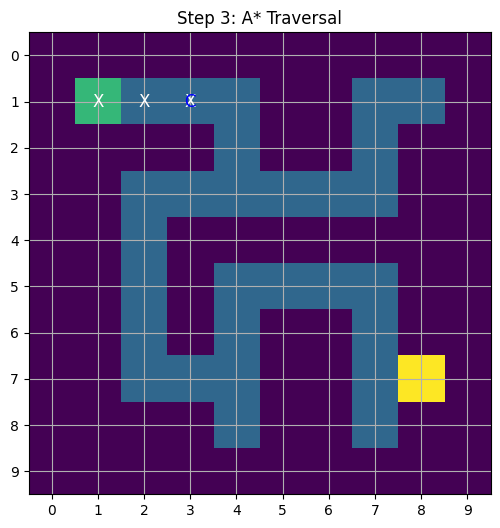

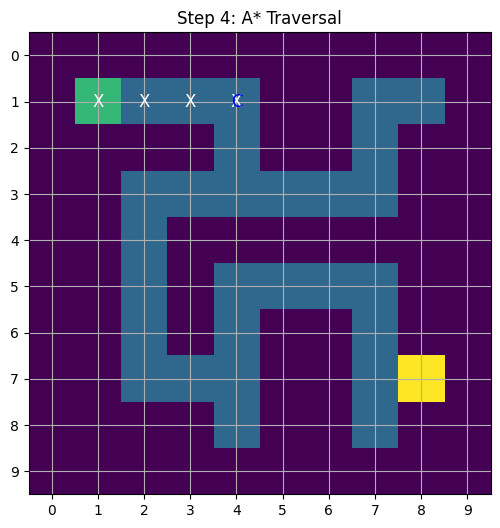

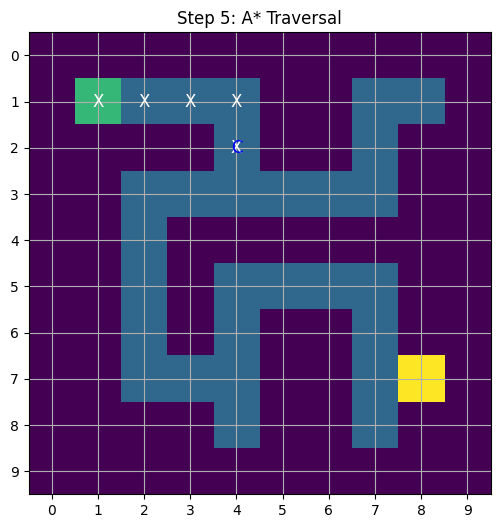

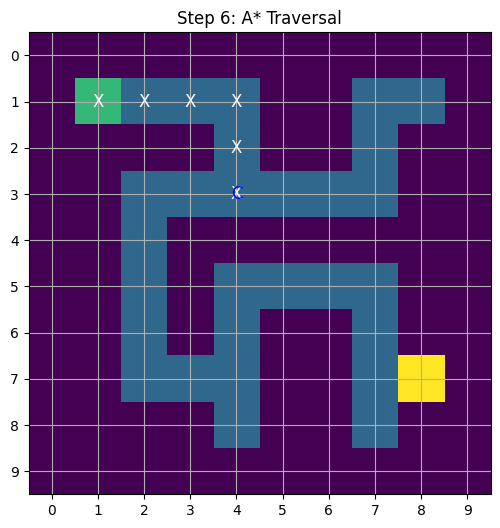

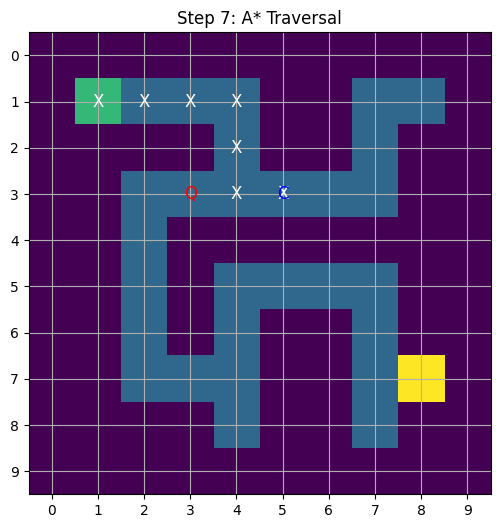

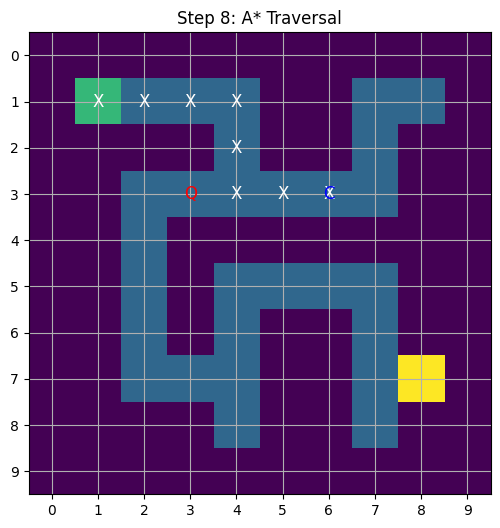

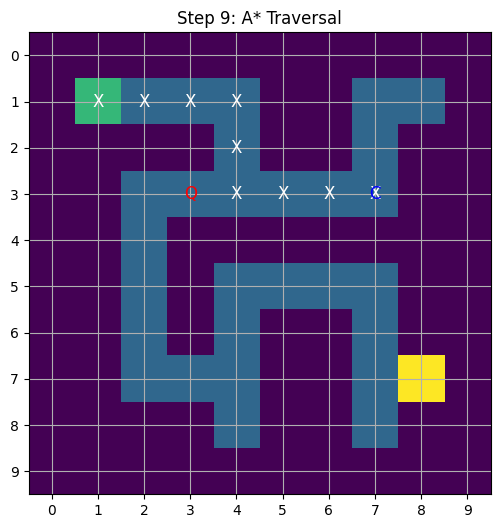

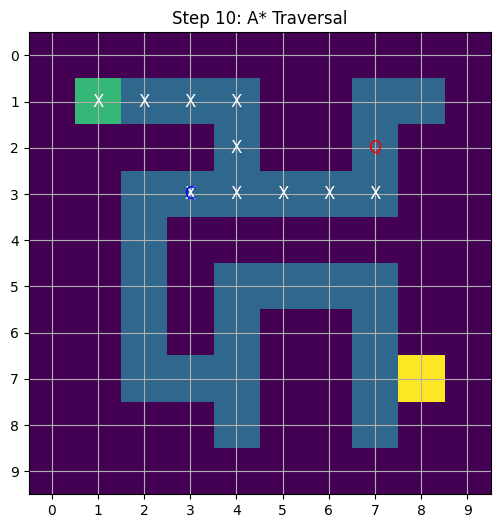

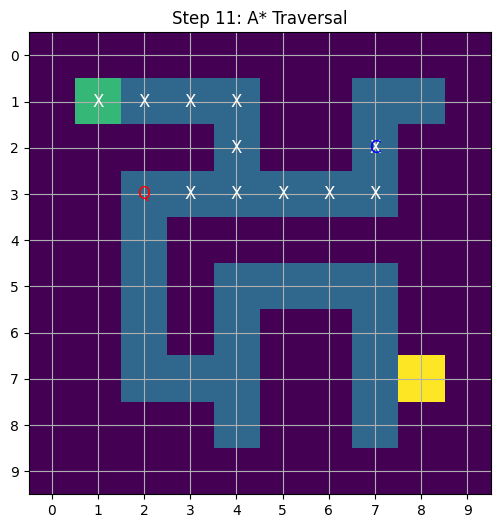

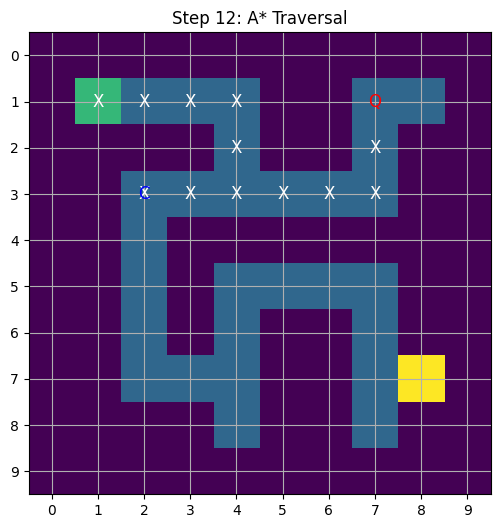

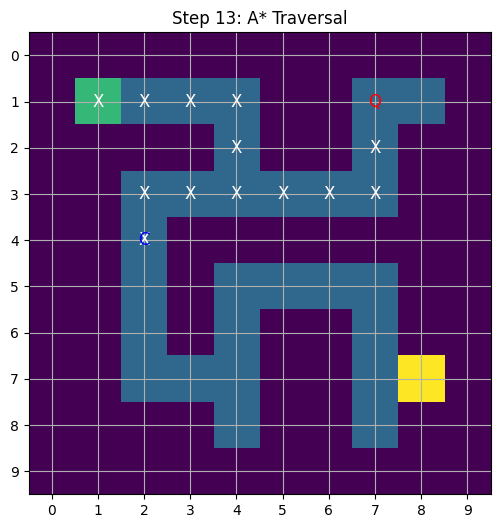

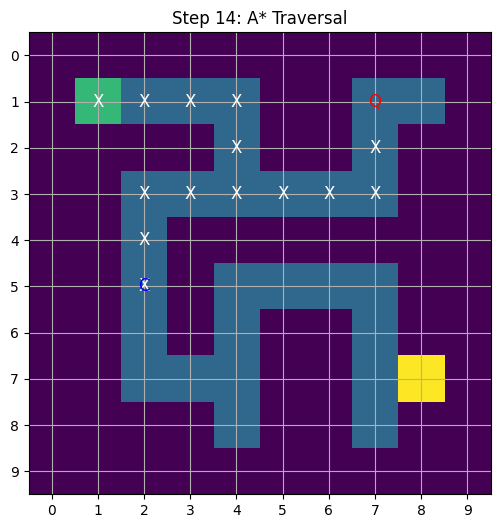

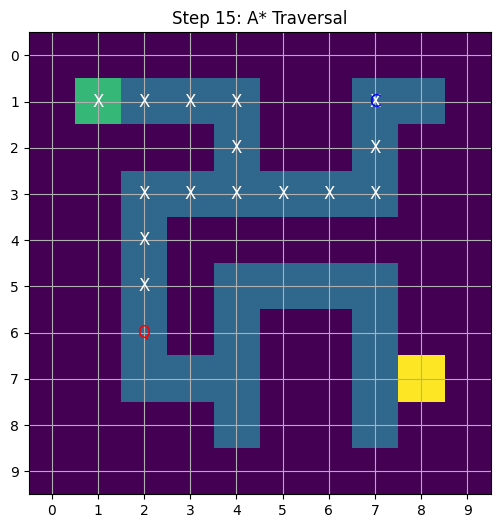

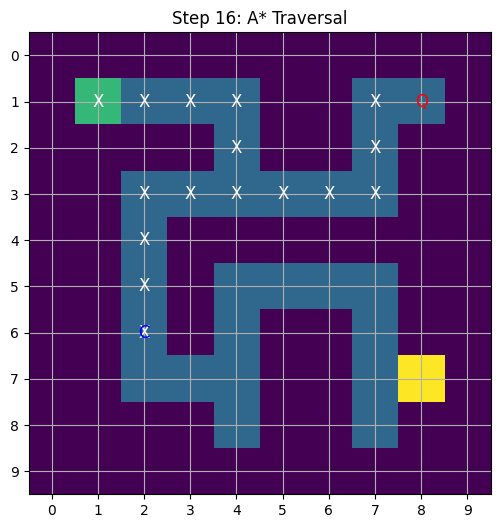

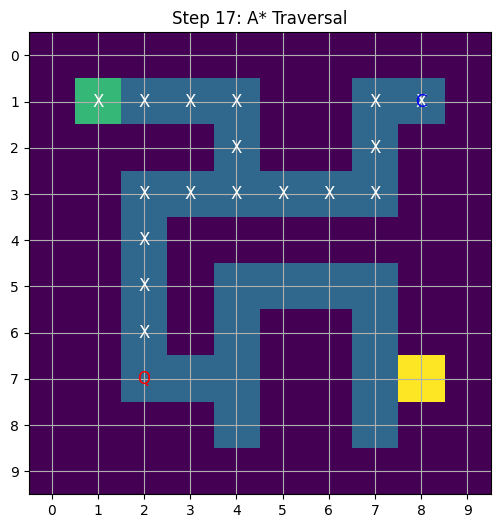

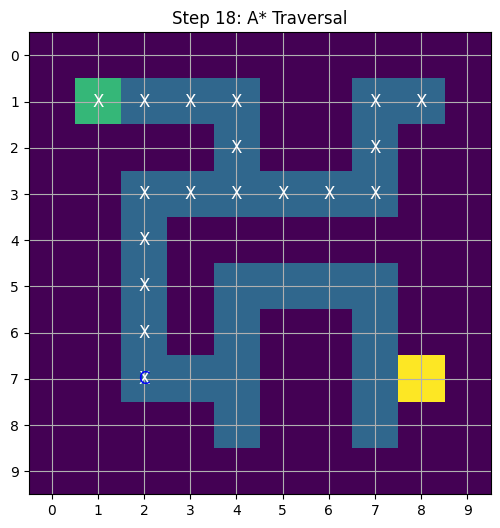

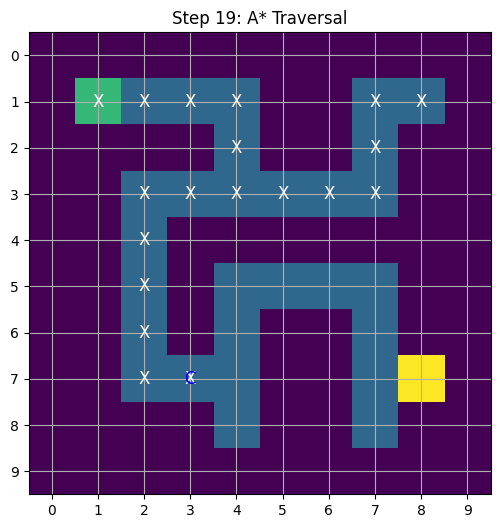

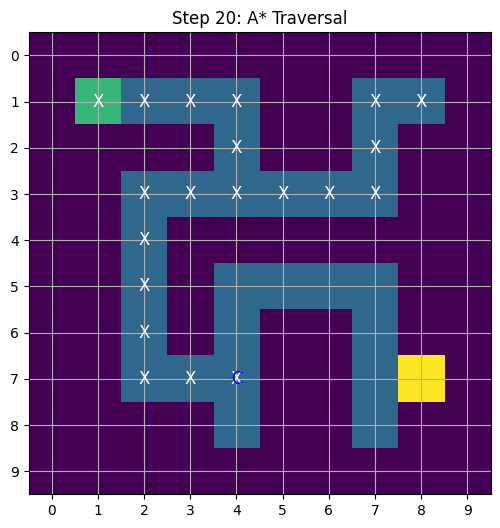

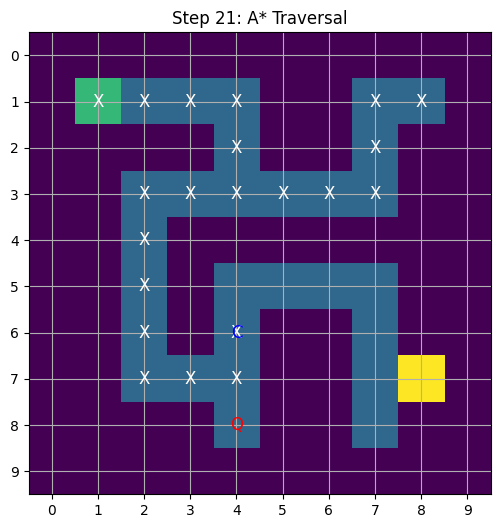

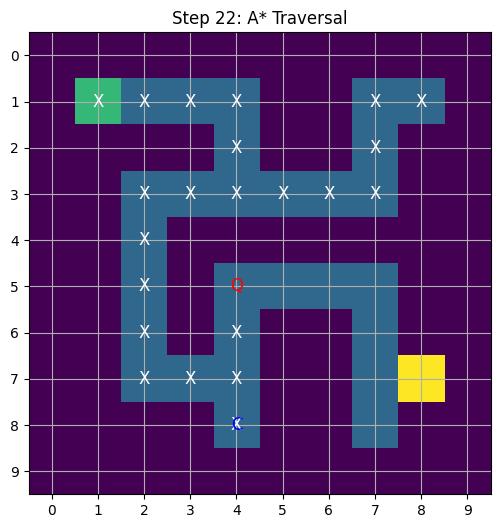

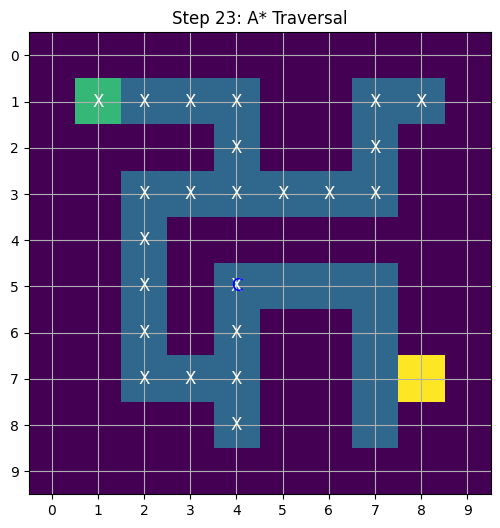

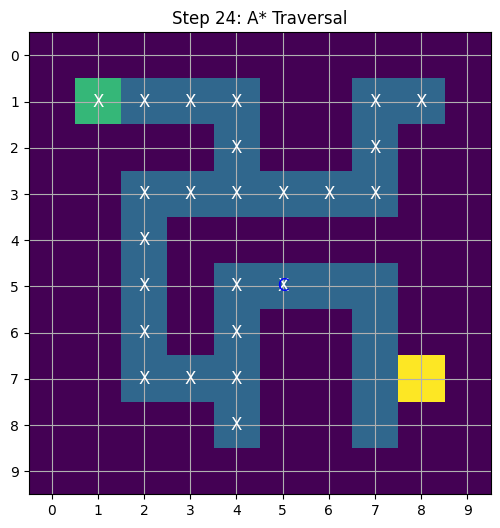

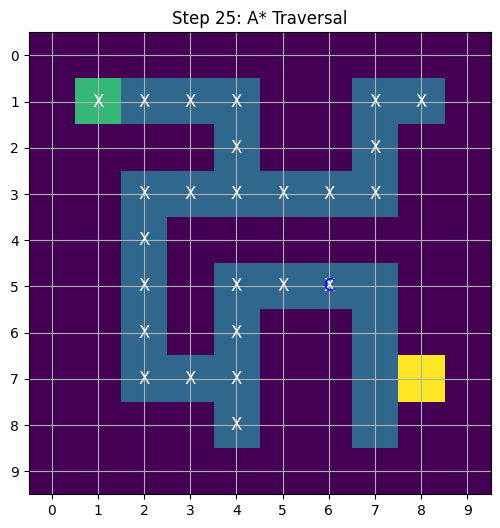

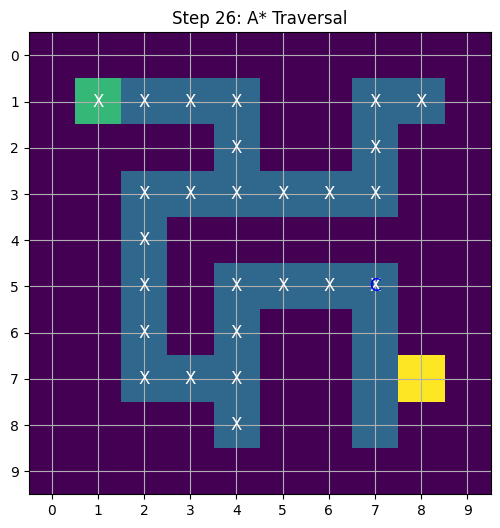

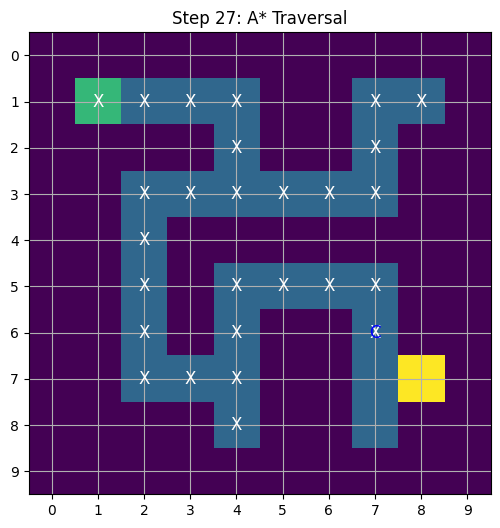

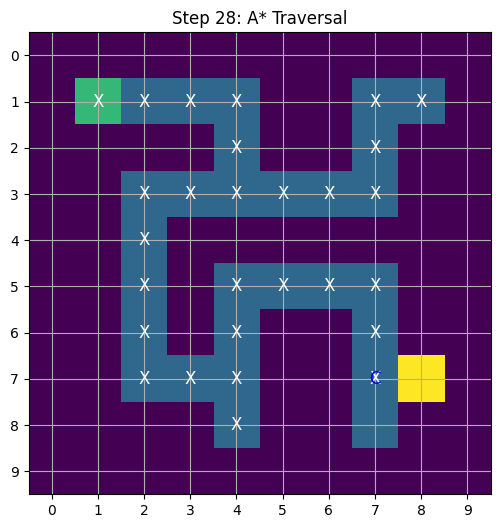

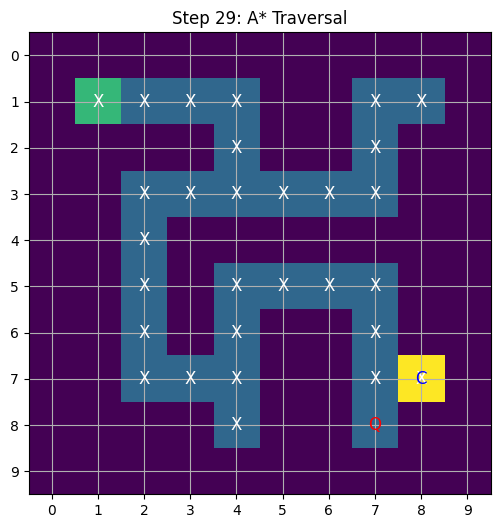

Path from start to goal: [(1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 3), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (7, 3), (7, 4), (6, 4), (5, 4), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (7, 8)]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

# Define the maze grid
starting_grid = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 1, 1, 1, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 1, 3, 0],
    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

def plot_grid(grid, visited, current, queue, title=""):
    plt.figure(figsize=(6, 6))
    cmap = plt.cm.viridis
    plt.imshow(grid, cmap=cmap)

    for (x, y) in visited:
        plt.text(y, x, 'X', ha='center', va='center', color='white', fontsize=12)

    for (x, y) in queue:
        plt.text(y, x, 'Q', ha='center', va='center', color='red', fontsize=12)

    if current:
        plt.text(current[1], current[0], 'C', ha='center', va='center', color='blue', fontsize=12)

    plt.title(title)
    plt.grid(True)
    plt.xticks(range(grid.shape[1]))
    plt.yticks(range(grid.shape[0]))
    plt.show()

def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid):
    start = tuple(np.argwhere(grid == 2)[0])  # Find the start position
    goal = tuple(np.argwhere(grid == 3)[0])   # Find the goal position

    open_list = []
    heappush(open_list, (0 + heuristic(start, goal), 0, start))  # (f, g, position)
    visited = set()
    parent_map = {}
    g_cost = {start: 0}

    steps = 0
    while open_list:
        _, current_g, current_node = heappop(open_list)
        steps += 1

        if current_node in visited:
            continue

        visited.add(current_node)
        parent_map[current_node] = parent_map.get(current_node, None)

        plot_grid(grid, visited, current_node, [node for _, _, node in open_list], f"Step {steps}: A* Traversal")

        if current_node == goal:
            break

        x, y = current_node
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            neighbor = (x + dx, y + dy)
            if (0 <= neighbor[0] < grid.shape[0] and
                    0 <= neighbor[1] < grid.shape[1] and
                    grid[neighbor] != 0 and
                    neighbor not in visited):
                tentative_g = current_g + 1
                if neighbor not in g_cost or tentative_g < g_cost[neighbor]:
                    g_cost[neighbor] = tentative_g
                    f_cost = tentative_g + heuristic(neighbor, goal)
                    heappush(open_list, (f_cost, tentative_g, neighbor))
                    parent_map[neighbor] = current_node

    # Trace the path from goal to start using parent_map
    path = []
    while goal is not None:
        path.append(goal)
        goal = parent_map.get(goal, None)
    
    print("Path from start to goal:", path[::-1])

# Driver code
print("Following is the A* Search for the maze problem:")
a_star(starting_grid)  # Function calling


In [5]:
import numpy as np
import heapq

# Define the goal state
goal_state = ((1, 2, 3), 
              (4, 5, 6), 
              (7, 8, 0))

# Possible moves: Up, Down, Left, Right
moves = {
    'Up': (-1, 0),
    'Down': (1, 0),
    'Left': (0, -1),
    'Right': (0, 1)
}

# Function to check if the current state is the goal state
def is_goal(state):
    return state == goal_state

# Function to get the blank (zero) position
def get_blank_position(state):
    for i, row in enumerate(state):
        for j, value in enumerate(row):
            if value == 0:
                return i, j

# Function to generate a new state after a move
def generate_new_state(state, move):
    i, j = get_blank_position(state)
    new_i, new_j = i + move[0], j + move[1]

    if 0 <= new_i < 3 and 0 <= new_j < 3:
        new_state = list(list(row) for row in state)
        new_state[i][j], new_state[new_i][new_j] = new_state[new_i][new_j], new_state[i][j]
        return tuple(tuple(row) for row in new_state)
    return None

# Heuristic function: Manhattan Distance
def manhattan_distance(state):
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 0:
                x, y = divmod(state[i][j] - 1, 3)
                distance += abs(x - i) + abs(y - j)
    return distance

# A* Search implementation for 8-puzzle
def a_star(initial_state):
    visited = set()  # Set for visited nodes
    priority_queue = []  # Priority queue to select nodes based on f = g + h
    g_cost = {initial_state: 0}  # Cost to reach each state
    parent_map = {}  # To reconstruct the path

    heapq.heappush(priority_queue, (manhattan_distance(initial_state), initial_state))  # (f, state)
    step_count = 0  # Count the number of steps

    while priority_queue:
        _, current_state = heapq.heappop(priority_queue)
        step_count += 1

        if current_state in visited:
            continue

        visited.add(current_state)
        if is_goal(current_state):
            break

        x, y = get_blank_position(current_state)
        for move_name, move in moves.items():
            new_state = generate_new_state(current_state, move)
            if new_state and new_state not in visited:
                tentative_g = g_cost[current_state] + 1
                if new_state not in g_cost or tentative_g < g_cost[new_state]:
                    g_cost[new_state] = tentative_g
                    f_cost = tentative_g + manhattan_distance(new_state)
                    heapq.heappush(priority_queue, (f_cost, new_state))
                    parent_map[new_state] = (current_state, move_name)

    # Output the solution path
    print("\nPath to Solution:")
    path = []
    state = goal_state
    while state in parent_map:
        parent, move = parent_map[state]
        path.append((state, move))
        state = parent
    path.append((initial_state, None))
    path.reverse()

    for idx, (state, move) in enumerate(path):
        print(f"Step {idx + 1}: Move: {move}")
        print(np.array(state))
        print()

    # Output the total number of steps
    print(f"Total number of steps: {step_count}")

# Driver Code
initial_state = ((1, 2, 3),
                 (4, 0, 6),
                 (7, 5, 8))  # Define the initial state of the puzzle

print("Following is the A* Search for the 8-puzzle problem")
a_star(initial_state)  # Function calling


Following is the A* Search for the 8-puzzle problem

Path to Solution:
Step 1: Move: None
[[1 2 3]
 [4 0 6]
 [7 5 8]]

Step 2: Move: Down
[[1 2 3]
 [4 5 6]
 [7 0 8]]

Step 3: Move: Right
[[1 2 3]
 [4 5 6]
 [7 8 0]]

Total number of steps: 3


In [6]:
import heapq

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic
        self.children = []
        self.g_cost = float('inf')  # Cost from start node
        self.parent = None  # To reconstruct the path

    def add_child(self, child, cost):
        self.children.append((child, cost))

def a_star_search(start_node, goal_node):
    open_list = []  # Priority queue
    heapq.heappush(open_list, (start_node.heuristic, start_node))  # (f, node)
    start_node.g_cost = 0  # Cost to reach the start node
    closed_list = set()

    while open_list:
        _, current_node = heapq.heappop(open_list)
        closed_list.add(current_node)

        if current_node.name == goal_node.name:
            path = []
            total_cost = current_node.g_cost
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1], total_cost

        for child, cost in current_node.children:
            if child in closed_list:
                continue

            tentative_g = current_node.g_cost + cost
            if tentative_g < child.g_cost:
                child.g_cost = tentative_g
                f_cost = tentative_g + child.heuristic
                child.parent = current_node
                if child not in [node for _, node in open_list]:
                    heapq.heappush(open_list, (f_cost, child))

    return None, float('inf')

# Define the graph structure
graph_structure = {
    'S': {'heuristic': 13, 'children': {'A': 3, 'B': 2}},
    'A': {'heuristic': 12, 'children': {'C': 4, 'D': 1}},
    'B': {'heuristic': 4, 'children': {'E': 3, 'F': 1}},
    'C': {'heuristic': 7, 'children': {}},
    'D': {'heuristic': 3, 'children': {}},
    'E': {'heuristic': 8, 'children': {'H': 5}},
    'F': {'heuristic': 2, 'children': {'I': 2, 'G': 3}},
    'H': {'heuristic': 4, 'children': {}},
    'I': {'heuristic': 9, 'children': {}},
    'G': {'heuristic': 0, 'children': {}}
}

# Create nodes
nodes = {name: Node(name, data['heuristic']) for name, data in graph_structure.items()}

# Create edges
for name, data in graph_structure.items():
    node = nodes[name]
    for child_name, cost in data['children'].items():
        node.add_child(nodes[child_name], cost)

# Perform A* Search
start_node = nodes['S']
goal_node = nodes['G']
path, path_cost = a_star_search(start_node, goal_node)
print("Path found:", path)
print("Path cost:", path_cost)


Path found: ['S', 'B', 'F', 'G']
Path cost: 6


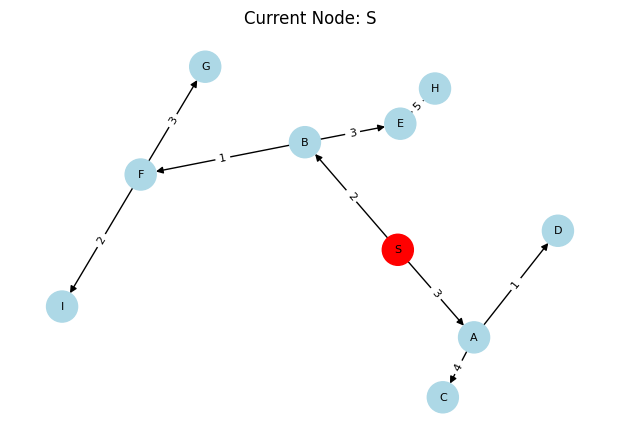

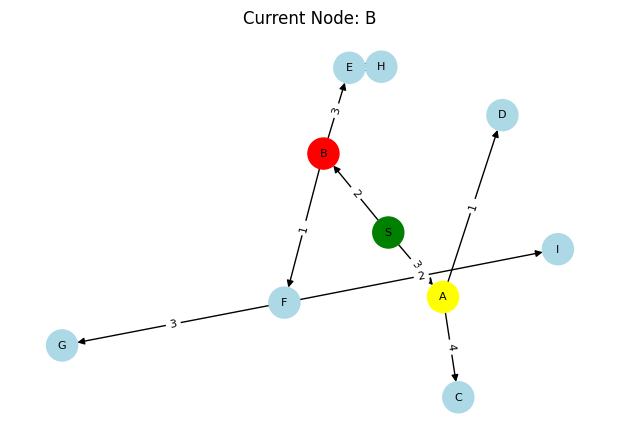

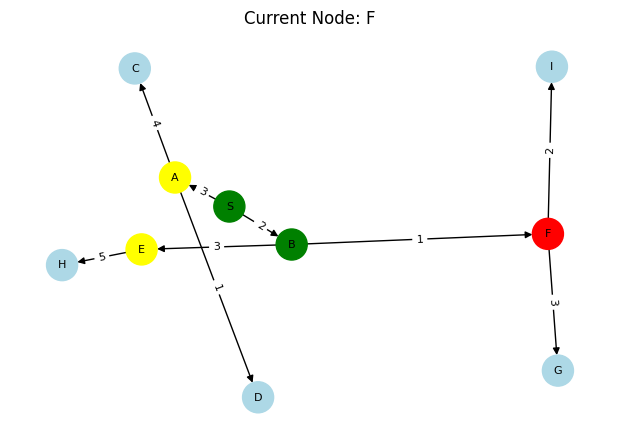

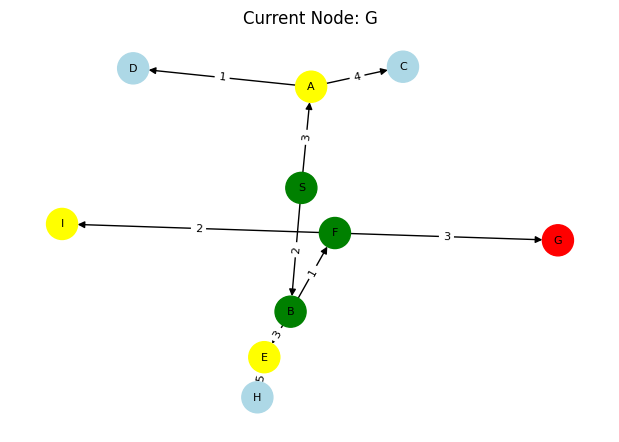

Path found: ['S', 'B', 'F', 'G']
Path cost: 6


In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

class Node:
    def __init__(self, name, heuristic):
        self.name = name
        self.heuristic = heuristic
        self.children = []
        self.g_cost = float('inf')  # Cost from start node
        self.parent = None  # To reconstruct the path

    def add_child(self, child, cost):
        self.children.append((child, cost))

def a_star_search(start_node, goal_node):
    open_list = []  # Priority queue
    heapq.heappush(open_list, (start_node.heuristic, start_node))  # (f, node)
    start_node.g_cost = 0  # Cost to reach the start node
    closed_list = set()

    while open_list:
        _, current_node = heapq.heappop(open_list)
        closed_list.add(current_node)

        visualize_graph(graph_structure, nodes, open_list, closed_list, current_node)

        if current_node.name == goal_node.name:
            path = []
            total_cost = current_node.g_cost
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1], total_cost

        for child, cost in current_node.children:
            if child in closed_list:
                continue

            tentative_g = current_node.g_cost + cost
            if tentative_g < child.g_cost:
                child.g_cost = tentative_g
                f_cost = tentative_g + child.heuristic
                child.parent = current_node
                if child not in [node for _, node in open_list]:
                    heapq.heappush(open_list, (f_cost, child))

    return None, float('inf')

def visualize_graph(graph_structure, nodes, open_list, closed_list, current_node):
    G = nx.DiGraph()
    for name, data in graph_structure.items():
        G.add_node(name, heuristic=data['heuristic'])
        for child_name, cost in data['children'].items():
            G.add_edge(name, child_name, weight=cost)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(6, 4))  # Smaller figure size
    node_colors = []
    for node in G.nodes():
        if nodes[node] == current_node:
            node_colors.append('red')
        elif nodes[node] in [n[1] for n in open_list]:
            node_colors.append('yellow')
        elif nodes[node] in closed_list:
            node_colors.append('green')
        else:
            node_colors.append('lightblue')

    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8)  # Smaller node size and font size
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=8)  # Smaller font size for edge labels
    
    plt.title(f"Current Node: {current_node.name}")
    plt.show()
    plt.pause(1)

# Define the graph structure
graph_structure = {
    'S': {'heuristic': 13, 'children': {'A': 3, 'B': 2}},
    'A': {'heuristic': 12, 'children': {'C': 4, 'D': 1}},
    'B': {'heuristic': 4, 'children': {'E': 3, 'F': 1}},
    'C': {'heuristic': 7, 'children': {}},
    'D': {'heuristic': 3, 'children': {}},
    'E': {'heuristic': 8, 'children': {'H': 5}},
    'F': {'heuristic': 2, 'children': {'I': 2, 'G': 3}},
    'H': {'heuristic': 4, 'children': {}},
    'I': {'heuristic': 9, 'children': {}},
    'G': {'heuristic': 0, 'children': {}}
}

# Create nodes
nodes = {name: Node(name, data['heuristic']) for name, data in graph_structure.items()}

# Create edges
for name, data in graph_structure.items():
    node = nodes[name]
    for child_name, cost in data['children'].items():
        node.add_child(nodes[child_name], cost)

# Perform A* Search
start_node = nodes['S']
goal_node = nodes['G']

plt.ion()
path, path_cost = a_star_search(start_node, goal_node)
plt.ioff()
plt.show()

print("Path found:", path)
print("Path cost:", path_cost)
